In [1]:
import requests
import os
import shutil
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from asyncore import write
from matplotlib import pyplot as plt
import numpy as np

C:\Users\dherz\AppData\Local\Temp\ipykernel_5296\10076001.py:9: DeprecationWarning: The asyncore module is deprecated and will be removed in Python 3.12. The recommended replacement is asyncio
  from asyncore import write


Range of years we will collect Pitching Data from 

In [2]:
years = list(range(2008,2022))

Collect Cy Young Voter Data by year

In [4]:
url_start = "https://www.baseball-reference.com/awards/awards_{}.shtml#AL_CYA_voting_link"

for year in years:
    url = url_start.format(year)
    
    data = requests.get(url)
    
    with open("CY{}.html".format(year), "w+") as f:
        f.write(data.text)

In [4]:
driver = webdriver.Chrome(executable_path="C:\\Users\\dherz\\Python\\chromedriver.exe")

for year in years:
    url = url_start.format(year)
    driver.get(url)
    driver.execute_script('window.scrollTo(1,1000)')
    time.sleep(2)
    html = driver.page_source
    
    with open('CY{}.html'.format(year),'w+',encoding="utf-8") as f:
        f.write(html)



C:\Users\dherz\AppData\Local\Temp\ipykernel_17916\2691963917.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="C:\\Users\\dherz\\Python\\chromedriver.exe")


In [5]:
dfs = []
for year in years:
    with open("CY{}.html".format(year),encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page,'html.parser')
    CY_table = soup.find(id="AL_CYA_voting")
    CY_df = pd.read_html(str(CY_table))[0]
    CY_df["Year"] = year
    dfs.append(CY_df)

In [6]:
CYs = pd.concat(dfs)
CYs.head()

,Rank,Name,Tm,Vote Pts,1st Place,Share,WAR,W,L,W-L%,...,BB,IBB,SO,HBP,BK,WP,BF,WHIP,ERA+,Year
0,1,Cliff Lee,CLE,132.0,24.0,94%,6.8,22,3,0.880,...,34,1,170,5,0,4,891,1.110,167,2008
1,2,Roy Halladay,TOR,71.0,4.0,51%,6.2,20,11,0.645,...,39,3,206,12,0,4,987,1.053,152,2008
2,3,Francisco Rodriguez,LAA,32.0,0.0,23%,2.5,2,3,0.400,...,34,4,77,2,0,6,288,1.288,199,2008
3,4,Daisuke Matsuzaka,BOS,10.0,0.0,7%,5.4,18,3,0.857,...,94,1,154,7,0,5,716,1.324,160,2008
4,5,Mariano Rivera,NYY,3.0,0.0,2%,4.3,6,5,0.545,...,6,0,77,2,0,1,259,0.665,316,2008


In [7]:

CYs.to_csv("CYs.csv")


Collecting all Pitchers data - we need to collect this to determine what sets the CYs from the other pitchers. 

In [8]:
player_stats_url = "https://www.baseball-reference.com/leagues/AL/{}-standard-pitching.shtml"

for year in years:
    url = player_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("player{}.html".format(year), "w+",encoding="utf-8") as f:
        f.write(data.text)

In [9]:
driver = webdriver.Chrome(executable_path="C:\\Users\\dherz\\Python\\chromedriver.exe")

for year in years:
    url = player_stats_url.format(year)
    
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    html = driver.page_source
    
    with open('player{}.html'.format(year),'w+',encoding="utf-8") as f:
        f.write(html)

C:\Users\dherz\AppData\Local\Temp\ipykernel_17916\532987090.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="C:\\Users\\dherz\\Python\\chromedriver.exe")


In [7]:
dfs = []
for year in years:
    with open("player{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    player_table = soup.find(id="players_standard_pitching")
    player_df = pd.read_html(str(player_table))[0]
    player_df["Year"] = year
    player_df.drop(player_df.index[player_df['Name'] == 'Name'], inplace=True)

    dfs.append(player_df)

In [8]:
players = pd.concat(dfs)
players.head()

,Rk,Name,Age,Tm,W,L,W-L%,ERA,G,GS,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Year
0,1,David Aardsma,26,BOS,4,2,.667,5.55,47,0,...,228,84,4.65,1.726,9.1,0.7,6.5,9.1,1.40,2008
1,2,Jeremy Accardo,26,TOR,0,3,.000,6.57,16,0,...,56,66,4.59,1.541,10.9,0.7,2.9,3.6,1.25,2008
2,3,Alfredo Aceves,25,NYY,1,0,1.000,2.40,6,4,...,120,185,4.80,1.167,7.5,1.2,3.0,4.8,1.60,2008
3,4,Nick Adenhart,21,LAA,1,0,1.000,9.00,3,3,...,63,51,5.72,2.583,13.5,0.0,9.8,3.0,0.31,2008
4,5,Jonathan Albaladejo,25,NYY,0,1,.000,3.95,7,0,...,58,114,3.50,1.537,9.9,0.7,4.0,8.6,2.17,2008


In [12]:

players.to_csv('player.csv',encoding='utf-8-sig')

Collecting Team Record Data - it is widely assusmed team record plays into an the chances of receiving a Cy Young Award.

In [10]:
driver = webdriver.Chrome(executable_path="C:\\Users\\dherz\\Python\\chromedriver.exe")

teamdfs = []
for year in years:
    team_url = 'https://www.baseball-reference.com/leagues/AL/{}-standings.shtml'.format(year)
    driver.get(team_url)
    driver.execute_script('window.scrollTo(1,1000)')
    time.sleep(10)
    html = driver.page_source
    team_data = pd.read_html(html)[7]
    team_data['Year'] = year
    teamdfs.append(team_data)
    

C:\Users\dherz\AppData\Local\Temp\ipykernel_10888\3052321994.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="C:\\Users\\dherz\\Python\\chromedriver.exe")


In [11]:
team = pd.concat(teamdfs)
team.head(20)

,Rk,Tm,W,L,W-L%,GB,GBsum,R,RA,Rdiff,...,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,Year
0,1.0,Los Angeles Angels of Anaheim,100,62,0.617,+5.0,NaN,4.7,4.3,0.4,...,10-8,50-31,50-31,3-5,31-21,67-46,33-16,46-30,54-32,2008
1,2.0,Tampa Bay Rays,97,65,0.599,+2.0,NaN,4.8,4.1,0.6,...,12-6,57-24,40-41,10-6,29-18,72-41,25-24,55-46,42-19,2008
2,3.0,Boston Red Sox,95,67,0.586,--,--,5.2,4.3,0.9,...,11-7,56-25,39-42,8-3,22-23,70-54,25-13,49-49,46-18,2008
3,4.0,New York Yankees,89,73,0.549,6.0,6.0,4.9,4.5,0.4,...,10-8,48-33,41-40,7-3,27-18,65-51,24-22,51-46,38-27,2008
4,5.0,Chicago White Sox,89,74,0.546,6.5,7.0,5.0,4.5,0.5,...,12-6,54-28,35-46,8-4,22-17,58-54,31-20,40-48,49-26,2008
5,6.0,Minnesota Twins,88,75,0.540,7.5,9.0,5.1,4.6,0.5,...,14-4,53-28,35-47,8-10,26-26,59-51,29-24,40-43,48-32,2008
6,7.0,Toronto Blue Jays,86,76,0.531,9.0,13.5,4.4,3.8,0.6,...,8-10,47-34,39-42,6-9,24-32,66-53,20-23,45-48,41-28,2008
7,8.0,Cleveland Indians,81,81,0.500,14.0,33.5,5.0,4.7,0.3,...,6-12,45-36,36-45,5-9,14-17,60-58,21-23,37-38,44-43,2008
8,9.0,Texas Rangers,79,83,0.488,16.0,43.5,5.6,6.0,-0.4,...,10-8,40-41,39-42,5-6,28-18,58-52,21-31,37-54,42-29,2008
9,10.0,Oakland Athletics,75,86,0.466,19.5,64.5,4.0,4.3,-0.3,...,10-8,43-38,32-48,8-7,25-24,50-58,25-28,39-52,36-34,2008


In [13]:
team['Tm'] = team['Tm'].str.replace('Los Angeles Angels of Anaheim','Los Angeles Angels')

In [14]:
team.to_csv('team.csv')

Data Cleaning

In [15]:
CYs = pd.read_csv("CYs.csv")


df = pd.read_csv(
    'CYs.csv', 
    dtype={
        'string_col': 'float16',
        'int_col': 'float16'
    }
)

In [16]:
CYs

,Unnamed: 0,Rank,Name,Tm,Vote Pts,1st Place,Share,WAR,W,L,...,BB,IBB,SO,HBP,BK,WP,BF,WHIP,ERA+,Year
0,0,1,Cliff Lee,CLE,132.0,24.0,94%,6.8,22,3,...,34,1,170,5,0,4,891,1.110,167,2008
1,1,2,Roy Halladay,TOR,71.0,4.0,51%,6.2,20,11,...,39,3,206,12,0,4,987,1.053,152,2008
2,2,3,Francisco Rodriguez,LAA,32.0,0.0,23%,2.5,2,3,...,34,4,77,2,0,6,288,1.288,199,2008
3,3,4,Daisuke Matsuzaka,BOS,10.0,0.0,7%,5.4,18,3,...,94,1,154,7,0,5,716,1.324,160,2008
4,4,5,Mariano Rivera,NYY,3.0,0.0,2%,4.3,6,5,...,6,0,77,2,0,1,259,0.665,316,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,7,8,Liam Hendriks,CHW,10.0,0.0,5%,2.6,8,3,...,7,1,113,1,0,6,267,0.732,173,2021
133,8,9,Jose Berrios,TOT,8.0,0.0,4%,3.3,12,9,...,45,0,204,15,0,3,781,1.063,123,2021
134,9,10,Chris Bassitt,OAK,2.0,0.0,1%,4.0,12,4,...,39,1,159,11,1,5,637,1.055,131,2021
135,10,11,Lucas Giolito,CHW,1.0,0.0,0%,4.2,11,9,...,52,1,201,2,0,12,720,1.103,124,2021


In [17]:
CYs = CYs[["Name", "Year", "Vote Pts", "Share"]]
CYs.head()

,Name,Year,Vote Pts,Share
0,Cliff Lee,2008,132.0,94%
1,Roy Halladay,2008,71.0,51%
2,Francisco Rodriguez,2008,32.0,23%
3,Daisuke Matsuzaka,2008,10.0,7%
4,Mariano Rivera,2008,3.0,2%


In [18]:
players = pd.read_csv("player.csv")
players

,Unnamed: 0,Rk,Name,Age,Tm,W,L,W-L%,ERA,G,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Year
0,0,1.0,David Aardsma,26.0,BOS,4,2,0.667,5.55,47,...,228,84.0,4.65,1.726,9.1,0.7,6.5,9.1,1.40,2008
1,1,2.0,Jeremy Accardo,26.0,TOR,0,3,0.000,6.57,16,...,56,66.0,4.59,1.541,10.9,0.7,2.9,3.6,1.25,2008
2,2,3.0,Alfredo Aceves,25.0,NYY,1,0,1.000,2.40,6,...,120,185.0,4.80,1.167,7.5,1.2,3.0,4.8,1.60,2008
3,3,4.0,Nick Adenhart,21.0,LAA,1,0,1.000,9.00,3,...,63,51.0,5.72,2.583,13.5,0.0,9.8,3.0,0.31,2008
4,4,5.0,Jonathan Albaladejo,25.0,NYY,0,1,0.000,3.95,7,...,58,114.0,3.50,1.537,9.9,0.7,4.0,8.6,2.17,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,550,530.0,T.J. Zeuch,25.0,TOR,0,2,0.000,6.60,5,...,74,69.0,9.10,2.000,12.6,3.6,5.4,4.8,0.89,2021
5734,551,531.0,Kyle Zimmer,29.0,KCR,4,1,0.800,4.83,52,...,223,95.0,4.82,1.407,7.7,1.2,5.0,7.7,1.53,2021
5735,552,532.0,Bruce Zimmermann*,26.0,BAL,4,5,0.444,5.04,14,...,285,89.0,5.38,1.508,10.5,2.0,3.1,7.8,2.55,2021
5736,553,533.0,Tyler Zuber,26.0,KCR,0,3,0.000,6.26,31,...,123,74.0,6.17,1.573,8.6,2.0,5.6,8.2,1.47,2021


In [19]:
del players["Unnamed: 0"]
del players["Rk"]

In [20]:
players.head()

,Name,Age,Tm,W,L,W-L%,ERA,G,GS,GF,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Year
0,David Aardsma,26.0,BOS,4,2,0.667,5.55,47,0,7,...,228,84.0,4.65,1.726,9.1,0.7,6.5,9.1,1.40,2008
1,Jeremy Accardo,26.0,TOR,0,3,0.000,6.57,16,0,6,...,56,66.0,4.59,1.541,10.9,0.7,2.9,3.6,1.25,2008
2,Alfredo Aceves,25.0,NYY,1,0,1.000,2.40,6,4,1,...,120,185.0,4.80,1.167,7.5,1.2,3.0,4.8,1.60,2008
3,Nick Adenhart,21.0,LAA,1,0,1.000,9.00,3,3,0,...,63,51.0,5.72,2.583,13.5,0.0,9.8,3.0,0.31,2008
4,Jonathan Albaladejo,25.0,NYY,0,1,0.000,3.95,7,0,2,...,58,114.0,3.50,1.537,9.9,0.7,4.0,8.6,2.17,2008


In [21]:
players['Name'].head(50)


0           David Aardsma
1          Jeremy Accardo
2          Alfredo Aceves
3           Nick Adenhart
4     Jonathan Albaladejo
5             Matt Albers
6             Greg Aquino
7          Jose Arredondo
8          Cha-Seung Baek
9             Scott Baker
10             John Bale*
11          Grant Balfour
12        Brian Bannister
13             Brian Bass
14             Brian Bass
15             Brian Bass
16         Miguel Batista
17             Rick Bauer
18         Denny Bautista
19         Yorman Bazardo
20           Josh Beckett
21           Erik Bedard*
22        Francis Beltran
23        Armando Benitez
24         Joaquin Benoit
25      Rafael Betancourt
26           Randor Bierd
27          Kurt Birkins*
28         Nick Blackburn
29            Joe Blanton
30         Jerry Blevins*
31       Jeremy Bonderman
32           Eddie Bonine
33            Boof Bonser
34        Chris Bootcheck
35           Joe Borowski
36         Michael Bowden
37         Dallas Braden*
38          

In [22]:
players['Name'] = players['Name'].str.replace('*', '', regex = False)

In [23]:
players['Name'].head(50)

0           David Aardsma
1          Jeremy Accardo
2          Alfredo Aceves
3           Nick Adenhart
4     Jonathan Albaladejo
5             Matt Albers
6             Greg Aquino
7          Jose Arredondo
8          Cha-Seung Baek
9             Scott Baker
10              John Bale
11          Grant Balfour
12        Brian Bannister
13             Brian Bass
14             Brian Bass
15             Brian Bass
16         Miguel Batista
17             Rick Bauer
18         Denny Bautista
19         Yorman Bazardo
20           Josh Beckett
21            Erik Bedard
22        Francis Beltran
23        Armando Benitez
24         Joaquin Benoit
25      Rafael Betancourt
26           Randor Bierd
27           Kurt Birkins
28         Nick Blackburn
29            Joe Blanton
30          Jerry Blevins
31       Jeremy Bonderman
32           Eddie Bonine
33            Boof Bonser
34        Chris Bootcheck
35           Joe Borowski
36         Michael Bowden
37          Dallas Braden
38          

In [24]:
players.groupby(['Name','Year'])

In [25]:
def single_row(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df['Tm'] == 'TOT']
        row['Tm'] = df.iloc[ -1,:]['Tm']
        return row

players = players.groupby(['Name','Year']).apply(single_row)

In [26]:
players.head(20)

Name   Age   Tm   W   L   W-L%   ERA   G  GS  \
Name         Year                                                              
A.J. Achter  2014 2096   A.J. Achter  25.0  MIN   1   0  1.000  3.27   7   0   
             2015 2515   A.J. Achter  26.0  MIN   0   1  0.000  6.75  11   0   
             2016 2934   A.J. Achter  27.0  LAA   1   0  1.000  3.11  27   0   
A.J. Alexy   2021 5213    A.J. Alexy  23.0  TEX   3   1  0.750  4.70   5   4   
A.J. Burnett 2008 54    A.J. Burnett  31.0  TOR  18  10  0.643  4.07  35  34   
             2009 386   A.J. Burnett  32.0  NYY  13   9  0.591  4.04  33  33   
             2010 729   A.J. Burnett  33.0  NYY  10  15  0.400  5.26  33  33   
             2011 1052  A.J. Burnett  34.0  NYY  11  11  0.500  5.15  33  32   
A.J. Cole    2018 3915     A.J. Cole  26.0  NYY   3   1  0.750  4.26  28   0   
             2019 4409     A.J. Cole  27.0  CLE   3   1  0.750  3.81  25   0   
             2020 4893     A.J. Cole  28.0  TOR   3   0  1.000  3.09  24   0   
             2021 5303     A.J. Cole  29.0  TOR   0   0    NaN  1.13   6   0   
A.J. Griffin 2012 1494  A.J. Griffin  24.0  OAK   7   1  0.875  3.06  15  15   
             2013 1852  A.J. Griffin  25.0  OAK  14  10  0.583  3.83  32  32   
             2016 3073  A.J. Griffin  28.0  TEX   7   4  0.636  5.07  23  23   
             2017 3527  A.J. Griffin  29.0  TEX   6   6  0.500  5.94  18  15   
A.J. Murray  2008 211    A.J. Murray  26.0  TEX   1   0  1.000  3.52   2   2   
A.J. Puk     2019 4666      A.J. Puk  24.0  OAK   2   0  1.000  3.18  10   0   
             2021 5582      A.J. Puk  26.0  OAK   0   3  0.000  6.08  12   0   
AJ Ramos     2021 5590      AJ Ramos  34.0  LAA   0   0    NaN  0.00   4   0   

                        GF  ...   BF   ERA+   FIP   WHIP    H9  HR9  BB9  \
Name         Year           ...                                            
A.J. Achter  2014 2096   1  ...   49  123.0  5.40  1.545  11.5  1.6  2.5   
             2015 2515   4  ...   58   62.0  6.28  1.350   8.1  2.7  4.1   
             2016 2934  17  ...  160  130.0  5.85  1.460  10.3  1.7  2.9   
A.J. Alexy   2021 5213   0  ...   97   95.0  6.30  1.304   5.1  1.6  6.7   
A.J. Burnett 2008 54     1  ...  957  104.0  3.45  1.342   8.6  0.8  3.5   
             2009 386    0  ...  896  114.0  4.33  1.401   8.4  1.1  4.2   
             2010 729    0  ...  829   82.0  4.83  1.511   9.8  1.2  3.8   
             2011 1052   0  ...  837   83.0  4.77  1.434   9.0  1.5  3.9   
A.J. Cole    2018 3915  13  ...  168   99.0  4.92  1.447   9.2  2.1  3.8   
             2019 4409   9  ...  118  125.0  3.83  1.500  10.7  1.4  2.8   
             2020 4893   7  ...   95  144.0  4.31  1.200   7.3  1.2  3.5   
             2021 5303   4  ...   30  413.0  3.42  0.875   6.8  1.1  1.1   
A.J. Griffin 2012 1494   0  ...  336  127.0  3.85  1.130   8.1  1.1  2.1   
             2013 1852   0  ...  823  101.0  4.55  1.125   7.7  1.6  2.4   
             2016 3073   0  ...  509   90.0  5.74  1.361   8.8  2.1  3.5   
             2017 3527   2  ...  338   81.0  6.26  1.345   8.8  2.3  3.3   
A.J. Murray  2008 211    0  ...   38  132.0  3.00  1.957  14.1  0.0  3.5   
A.J. Puk     2019 4666   0  ...   47  139.0  3.39  1.324   7.9  0.8  4.0   
             2021 5582   3  ...   65   70.0  3.32  1.800  12.2  0.7  4.1   
AJ Ramos     2021 5590   3  ...   16    NaN  3.17  0.429   0.0  0.0  3.9   

                         SO9  SO/W  Year  
Name         Year                         
A.J. Achter  2014 2096   4.1  1.67  2014  
             2015 2515   9.5  2.33  2015  
             2016 2934   3.3  1.17  2016  
A.J. Alexy   2021 5213   6.7  1.00  2021  
A.J. Burnett 2008 54     9.4  2.69  2008  
             2009 386    8.5  2.01  2009  
             2010 729    7.0  1.86  2010  
             2011 1052   8.2  2.08  2011  
A.J. Cole    2018 3915  11.6  3.06  2018  
             2019 4409  10.4  3.75  2019  
             2020 4893   7.7  2.22  2020  
             2021 5303   7.9  7.00  202

In [27]:
players.index = players.index.droplevel()

In [28]:
players.index = players.index.droplevel()

Combining all player data with Cy Young Vote getters

In [29]:
combined = players.merge(CYs, how ='outer', on = ['Name', 'Year'])
combined.head()

,Name,Age,Tm,W,L,W-L%,ERA,G,GS,GF,...,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Year,Vote Pts,Share
0,A.J. Achter,25.0,MIN,1,0,1.000,3.27,7,0,1,...,5.40,1.545,11.5,1.6,2.5,4.1,1.67,2014,NaN,NaN
1,A.J. Achter,26.0,MIN,0,1,0.000,6.75,11,0,4,...,6.28,1.350,8.1,2.7,4.1,9.5,2.33,2015,NaN,NaN
2,A.J. Achter,27.0,LAA,1,0,1.000,3.11,27,0,17,...,5.85,1.460,10.3,1.7,2.9,3.3,1.17,2016,NaN,NaN
3,A.J. Alexy,23.0,TEX,3,1,0.750,4.70,5,4,0,...,6.30,1.304,5.1,1.6,6.7,6.7,1.00,2021,NaN,NaN
4,A.J. Burnett,31.0,TOR,18,10,0.643,4.07,35,34,1,...,3.45,1.342,8.6,0.8,3.5,9.4,2.69,2008,NaN,NaN


In [30]:
combined[combined['Vote Pts'] > 0]

,Name,Age,Tm,W,L,W-L%,ERA,G,GS,GF,...,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Year,Vote Pts,Share
59,Aaron Sanchez,23.0,TOR,15,2,0.882,3.00,30,30,0,...,3.55,1.167,7.5,0.7,3.0,7.5,2.56,2016,6.0,3%
261,Andrew Miller,30.0,NYY,3,2,0.600,2.04,60,0,53,...,2.16,0.859,4.8,0.7,2.9,14.6,5.00,2015,3.0,1%
262,Andrew Miller,31.0,CLE,10,1,0.909,1.45,70,0,23,...,1.68,0.686,5.1,1.0,1.1,14.9,13.67,2016,3.0,1%
295,Anibal Sanchez,29.0,DET,14,8,0.636,2.57,29,29,0,...,2.39,1.154,7.7,0.4,2.7,10.0,3.74,2013,46.0,22%
402,Bartolo Colon,40.0,OAK,18,6,0.750,2.65,30,30,0,...,3.23,1.166,9.1,0.7,1.4,5.5,4.03,2013,25.0,12%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5041,Wade Davis,29.0,KCR,8,1,0.889,0.94,69,0,24,...,2.29,0.787,4.4,0.4,2.7,10.4,3.90,2015,10.0,5%
5147,Yu Darvish,25.0,TEX,16,9,0.640,3.90,29,29,0,...,3.29,1.280,7.3,0.7,4.2,10.4,2.48,2012,1.0,1%
5148,Yu Darvish,26.0,TEX,13,9,0.591,2.83,32,32,0,...,3.28,1.073,6.2,1.1,3.4,11.9,3.46,2013,93.0,44%
5204,Zack Britton,28.0,BAL,2,1,0.667,0.54,69,0,63,...,1.94,0.836,5.1,0.1,2.4,9.9,4.11,2016,72.0,34%


In [31]:
combined[['Vote Pts','Share']] = combined[['Vote Pts','Share']].fillna(0)
combined.head()

,Name,Age,Tm,W,L,W-L%,ERA,G,GS,GF,...,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Year,Vote Pts,Share
0,A.J. Achter,25.0,MIN,1,0,1.000,3.27,7,0,1,...,5.40,1.545,11.5,1.6,2.5,4.1,1.67,2014,0.0,0
1,A.J. Achter,26.0,MIN,0,1,0.000,6.75,11,0,4,...,6.28,1.350,8.1,2.7,4.1,9.5,2.33,2015,0.0,0
2,A.J. Achter,27.0,LAA,1,0,1.000,3.11,27,0,17,...,5.85,1.460,10.3,1.7,2.9,3.3,1.17,2016,0.0,0
3,A.J. Alexy,23.0,TEX,3,1,0.750,4.70,5,4,0,...,6.30,1.304,5.1,1.6,6.7,6.7,1.00,2021,0.0,0
4,A.J. Burnett,31.0,TOR,18,10,0.643,4.07,35,34,1,...,3.45,1.342,8.6,0.8,3.5,9.4,2.69,2008,0.0,0


Continued Data Cleaning

In [32]:
teams = pd.read_csv('team.csv')

In [33]:
teams.head(50)

,Unnamed: 0,Rk,Tm,W,L,W-L%,GB,GBsum,R,RA,...,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,Year
0,0,1.0,Los Angeles Angels,100,62,0.617,+5.0,NaN,4.7,4.3,...,10-8,50-31,50-31,3-5,31-21,67-46,33-16,46-30,54-32,2008
1,1,2.0,Tampa Bay Rays,97,65,0.599,+2.0,NaN,4.8,4.1,...,12-6,57-24,40-41,10-6,29-18,72-41,25-24,55-46,42-19,2008
2,2,3.0,Boston Red Sox,95,67,0.586,--,--,5.2,4.3,...,11-7,56-25,39-42,8-3,22-23,70-54,25-13,49-49,46-18,2008
3,3,4.0,New York Yankees,89,73,0.549,6.0,6.0,4.9,4.5,...,10-8,48-33,41-40,7-3,27-18,65-51,24-22,51-46,38-27,2008
4,4,5.0,Chicago White Sox,89,74,0.546,6.5,7.0,5.0,4.5,...,12-6,54-28,35-46,8-4,22-17,58-54,31-20,40-48,49-26,2008
5,5,6.0,Minnesota Twins,88,75,0.540,7.5,9.0,5.1,4.6,...,14-4,53-28,35-47,8-10,26-26,59-51,29-24,40-43,48-32,2008
6,6,7.0,Toronto Blue Jays,86,76,0.531,9.0,13.5,4.4,3.8,...,8-10,47-34,39-42,6-9,24-32,66-53,20-23,45-48,41-28,2008
7,7,8.0,Cleveland Indians,81,81,0.500,14.0,33.5,5.0,4.7,...,6-12,45-36,36-45,5-9,14-17,60-58,21-23,37-38,44-43,2008
8,8,9.0,Texas Rangers,79,83,0.488,16.0,43.5,5.6,6.0,...,10-8,40-41,39-42,5-6,28-18,58-52,21-31,37-54,42-29,2008
9,9,10.0,Oakland Athletics,75,86,0.466,19.5,64.5,4.0,4.3,...,10-8,43-38,32-48,8-7,25-24,50-58,25-28,39-52,36-34,2008


In [35]:
teams = teams[~teams['Tm'].str.contains('Average')] 

In [36]:
teams.head(50)

,Unnamed: 0,Rk,Tm,W,L,W-L%,GB,GBsum,R,RA,...,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,Year
0,0,1.0,Los Angeles Angels,100,62,0.617,+5.0,NaN,4.7,4.3,...,10-8,50-31,50-31,3-5,31-21,67-46,33-16,46-30,54-32,2008
1,1,2.0,Tampa Bay Rays,97,65,0.599,+2.0,NaN,4.8,4.1,...,12-6,57-24,40-41,10-6,29-18,72-41,25-24,55-46,42-19,2008
2,2,3.0,Boston Red Sox,95,67,0.586,--,--,5.2,4.3,...,11-7,56-25,39-42,8-3,22-23,70-54,25-13,49-49,46-18,2008
3,3,4.0,New York Yankees,89,73,0.549,6.0,6.0,4.9,4.5,...,10-8,48-33,41-40,7-3,27-18,65-51,24-22,51-46,38-27,2008
4,4,5.0,Chicago White Sox,89,74,0.546,6.5,7.0,5.0,4.5,...,12-6,54-28,35-46,8-4,22-17,58-54,31-20,40-48,49-26,2008
5,5,6.0,Minnesota Twins,88,75,0.540,7.5,9.0,5.1,4.6,...,14-4,53-28,35-47,8-10,26-26,59-51,29-24,40-43,48-32,2008
6,6,7.0,Toronto Blue Jays,86,76,0.531,9.0,13.5,4.4,3.8,...,8-10,47-34,39-42,6-9,24-32,66-53,20-23,45-48,41-28,2008
7,7,8.0,Cleveland Indians,81,81,0.500,14.0,33.5,5.0,4.7,...,6-12,45-36,36-45,5-9,14-17,60-58,21-23,37-38,44-43,2008
8,8,9.0,Texas Rangers,79,83,0.488,16.0,43.5,5.6,6.0,...,10-8,40-41,39-42,5-6,28-18,58-52,21-31,37-54,42-29,2008
9,9,10.0,Oakland Athletics,75,86,0.466,19.5,64.5,4.0,4.3,...,10-8,43-38,32-48,8-7,25-24,50-58,25-28,39-52,36-34,2008


In [106]:
teams['Tm'].unique()

array(['Los Angeles Angels', 'Tampa Bay Rays', 'Boston Red Sox',
       'New York Yankees', 'Chicago White Sox', 'Minnesota Twins',
       'Toronto Blue Jays', 'Cleveland Indians', 'Texas Rangers',
       'Oakland Athletics', 'Kansas City Royals', 'Detroit Tigers',
       'Baltimore Orioles', 'Seattle Mariners', 'Houston Astros'],
      dtype=object)

In [39]:
combined['Tm'].unique()

array(['MIN', 'LAA', 'TEX', 'TOR', 'NYY', 'CLE', 'OAK', 'CHW', 'KCR',
       'BAL', 'BOS', 'SEA', 'TBR', 'HOU', 'DET', nan], dtype=object)

In [40]:
nicknames = {}

with open('nicknames.csv') as f:
    lines = f.readlines()
    for line in lines:
         abbrev,name = line.replace("\n",'').split(',')
         nicknames[abbrev] = name
         
    

In [41]:
combined['Team'] = combined['Tm'].map(nicknames)

In [42]:
combined.head(5)

,Name,Age,Tm,W,L,W-L%,ERA,G,GS,GF,...,WHIP,H9,HR9,BB9,SO9,SO/W,Year,Vote Pts,Share,Team
0,A.J. Achter,25.0,MIN,1,0,1.000,3.27,7,0,1,...,1.545,11.5,1.6,2.5,4.1,1.67,2014,0.0,0,Minnesota Twins
1,A.J. Achter,26.0,MIN,0,1,0.000,6.75,11,0,4,...,1.350,8.1,2.7,4.1,9.5,2.33,2015,0.0,0,Minnesota Twins
2,A.J. Achter,27.0,LAA,1,0,1.000,3.11,27,0,17,...,1.460,10.3,1.7,2.9,3.3,1.17,2016,0.0,0,Los Angeles Angels
3,A.J. Alexy,23.0,TEX,3,1,0.750,4.70,5,4,0,...,1.304,5.1,1.6,6.7,6.7,1.00,2021,0.0,0,Texas Rangers
4,A.J. Burnett,31.0,TOR,18,10,0.643,4.07,35,34,1,...,1.342,8.6,0.8,3.5,9.4,2.69,2008,0.0,0,Toronto Blue Jays


In [43]:
pd.options.mode.chained_assignment = None 
team.rename(columns = {'Tm':'Team'}, inplace = True)
team.head()

,Rk,Team,W,L,W-L%,GB,GBsum,R,RA,Rdiff,...,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,Year
0,1.0,Los Angeles Angels,100,62,0.617,+5.0,NaN,4.7,4.3,0.4,...,10-8,50-31,50-31,3-5,31-21,67-46,33-16,46-30,54-32,2008
1,2.0,Tampa Bay Rays,97,65,0.599,+2.0,NaN,4.8,4.1,0.6,...,12-6,57-24,40-41,10-6,29-18,72-41,25-24,55-46,42-19,2008
2,3.0,Boston Red Sox,95,67,0.586,--,--,5.2,4.3,0.9,...,11-7,56-25,39-42,8-3,22-23,70-54,25-13,49-49,46-18,2008
3,4.0,New York Yankees,89,73,0.549,6.0,6.0,4.9,4.5,0.4,...,10-8,48-33,41-40,7-3,27-18,65-51,24-22,51-46,38-27,2008
4,5.0,Chicago White Sox,89,74,0.546,6.5,7.0,5.0,4.5,0.5,...,12-6,54-28,35-46,8-4,22-17,58-54,31-20,40-48,49-26,2008


In [44]:
team.to_csv("team.csv")
combined.to_csv('combined.csv')

In [45]:
team.head()

,Rk,Team,W,L,W-L%,GB,GBsum,R,RA,Rdiff,...,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,Year
0,1.0,Los Angeles Angels,100,62,0.617,+5.0,NaN,4.7,4.3,0.4,...,10-8,50-31,50-31,3-5,31-21,67-46,33-16,46-30,54-32,2008
1,2.0,Tampa Bay Rays,97,65,0.599,+2.0,NaN,4.8,4.1,0.6,...,12-6,57-24,40-41,10-6,29-18,72-41,25-24,55-46,42-19,2008
2,3.0,Boston Red Sox,95,67,0.586,--,--,5.2,4.3,0.9,...,11-7,56-25,39-42,8-3,22-23,70-54,25-13,49-49,46-18,2008
3,4.0,New York Yankees,89,73,0.549,6.0,6.0,4.9,4.5,0.4,...,10-8,48-33,41-40,7-3,27-18,65-51,24-22,51-46,38-27,2008
4,5.0,Chicago White Sox,89,74,0.546,6.5,7.0,5.0,4.5,0.5,...,12-6,54-28,35-46,8-4,22-17,58-54,31-20,40-48,49-26,2008


In [46]:
combined.head()

,Name,Age,Tm,W,L,W-L%,ERA,G,GS,GF,...,WHIP,H9,HR9,BB9,SO9,SO/W,Year,Vote Pts,Share,Team
0,A.J. Achter,25.0,MIN,1,0,1.000,3.27,7,0,1,...,1.545,11.5,1.6,2.5,4.1,1.67,2014,0.0,0,Minnesota Twins
1,A.J. Achter,26.0,MIN,0,1,0.000,6.75,11,0,4,...,1.350,8.1,2.7,4.1,9.5,2.33,2015,0.0,0,Minnesota Twins
2,A.J. Achter,27.0,LAA,1,0,1.000,3.11,27,0,17,...,1.460,10.3,1.7,2.9,3.3,1.17,2016,0.0,0,Los Angeles Angels
3,A.J. Alexy,23.0,TEX,3,1,0.750,4.70,5,4,0,...,1.304,5.1,1.6,6.7,6.7,1.00,2021,0.0,0,Texas Rangers
4,A.J. Burnett,31.0,TOR,18,10,0.643,4.07,35,34,1,...,1.342,8.6,0.8,3.5,9.4,2.69,2008,0.0,0,Toronto Blue Jays


Comine Team data with our player/CY data 

In [47]:

stats = combined.merge(team, how='outer', on=['Team','Year'])
stats

,Name,Age,Tm,W_x,L_x,W-L%_x,ERA,G,GS,GF,...,vWest,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500
0,A.J. Achter,25.0,MIN,1.0,0.0,1.000,3.27,7.0,0.0,1.0,...,11-23,9-11,35-46,35-46,6-7,21-24,46-60,24-32,44-64,26-28
1,Aaron Thompson,27.0,MIN,0.0,0.0,NaN,2.45,7.0,0.0,2.0,...,11-23,9-11,35-46,35-46,6-7,21-24,46-60,24-32,44-64,26-28
2,Anthony Swarzak,28.0,MIN,3.0,2.0,0.600,4.60,50.0,4.0,11.0,...,11-23,9-11,35-46,35-46,6-7,21-24,46-60,24-32,44-64,26-28
3,Brian Duensing,31.0,MIN,3.0,3.0,0.500,3.31,62.0,0.0,10.0,...,11-23,9-11,35-46,35-46,6-7,21-24,46-60,24-32,44-64,26-28
4,Caleb Thielbar,27.0,MIN,2.0,1.0,0.667,3.40,54.0,0.0,7.0,...,11-23,9-11,35-46,35-46,6-7,21-24,46-60,24-32,44-64,26-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23-23,10-9,43-37,38-42,6-5,20-20,59-56,22-23,24-32,57-47
5234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21-25,9-10,42-38,37-43,6-6,22-22,56-56,23-25,31-47,49-34
5235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22-24,8-11,41-39,38-42,6-6,19-20,54-56,25-25,30-47,49-34
5236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6-6,9-9,17-12,12-17,2-3,8-8,21-21,8-8,11-16,18-13


In [48]:
stats = stats[~stats['Name'].str.contains('LgAvg per 180 IP',na=False)] 
stats = stats[~stats['Team'].str.contains('Average',na=False)] 

In [49]:
stats.rename(columns = {'W_y':'Team Wins','L_y':'Team Losses','W-L%_y':'Team W-L %', 'W_x':'Wins', 'L_x':'Losses', 'W-L%_x': 'W-L %'}, inplace = True)
stats
stats.to_csv('stats.csv')


In [50]:
stats = stats.apply(pd.to_numeric, errors = 'ignore')

In [51]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 0 to 5209
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5210 non-null   object 
 1   Age          5210 non-null   float64
 2   Tm           5210 non-null   object 
 3   Wins         5210 non-null   float64
 4   Losses       5210 non-null   float64
 5   W-L %        4100 non-null   float64
 6   ERA          5210 non-null   float64
 7   G            5210 non-null   float64
 8   GS           5210 non-null   float64
 9   GF           5210 non-null   float64
 10  CG           5210 non-null   float64
 11  SHO          5210 non-null   float64
 12  SV           5210 non-null   float64
 13  IP           5210 non-null   float64
 14  H            5210 non-null   float64
 15  R_x          5210 non-null   float64
 16  ER           5210 non-null   float64
 17  HR           5210 non-null   float64
 18  BB           5210 non-null   float64
 19  IBB   

In [52]:
stats["Share"] = stats["Share"].str.replace("%","")

In [53]:
stats['Share'] = stats['Share'].fillna(0)

In [54]:
stats['Share'] = stats['Share'].astype(int)


In [55]:
stats['Share'].unique()

array([  0,   3,  51,   9,  52,  32,   1,   2,  30,  24,   4,  99,  12,
        10,  39,   6,  22,  16,  23,   5, 100,  35,  94,  68,   7,  76,
        81,  36,  34,  37,  80,  14,  20,  47,  21,  60,  13,  97,   8,
        15,  59,  78,  19,  63,  44,  57,  96,  85,  89,  17,  49,  28,
        73,  65])

In [56]:
stats['GB'] = stats['GB'].str.replace('--','0')
stats['GB'] = stats['GB'].str.replace('+','')
stats['GB'] = stats['GB'].fillna(0)
stats['GB'].unique()


C:\Users\dherz\AppData\Local\Temp\ipykernel_10888\830383337.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stats['GB'] = stats['GB'].str.replace('+','')


array(['18.0', '3.0', '15.0', '32.0', '9.0', '8.0', '0', '6.0', '1.0',
       '4.5', '7.0', '16.0', '23.5', '42.0', '35.0', '12.0', '24.0',
       '20.0', '21.0', '5.5', '5.0', '2.0', '20.5', '14.0', '30.0',
       '26.0', '17.5', '11.0', '19.0', '31.0', '10.0', '26.5', '40.0',
       '6.5', '4.0', '28.5', '17.0', '1.5', '11.5', '19.5', '29.0',
       '28.0', '27.0', '50.0', '37.0', '2.5', '33.0', '9.5', '22.0',
       '25.5', '8.5', '34.0', '13.5', '39.0', '48.5', '0.5', '7.5',
       '40.5', '25.0'], dtype=object)

In [57]:
stats['GB'] = pd.to_numeric(stats['GB'])


In [58]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 0 to 5209
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5210 non-null   object 
 1   Age          5210 non-null   float64
 2   Tm           5210 non-null   object 
 3   Wins         5210 non-null   float64
 4   Losses       5210 non-null   float64
 5   W-L %        4100 non-null   float64
 6   ERA          5210 non-null   float64
 7   G            5210 non-null   float64
 8   GS           5210 non-null   float64
 9   GF           5210 non-null   float64
 10  CG           5210 non-null   float64
 11  SHO          5210 non-null   float64
 12  SV           5210 non-null   float64
 13  IP           5210 non-null   float64
 14  H            5210 non-null   float64
 15  R_x          5210 non-null   float64
 16  ER           5210 non-null   float64
 17  HR           5210 non-null   float64
 18  BB           5210 non-null   float64
 19  IBB   

In [59]:
columns = ['<.500','≥.500','vLHP','vRHP','1Run','ExInn','Road','Home','Inter','vWest','vCent','vEast','Luck','GBsum','SRS','SOS','Rdiff','RA','R_y','pythWL']
stats.drop(columns, inplace=True, axis=1)

In [60]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 0 to 5209
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5210 non-null   object 
 1   Age          5210 non-null   float64
 2   Tm           5210 non-null   object 
 3   Wins         5210 non-null   float64
 4   Losses       5210 non-null   float64
 5   W-L %        4100 non-null   float64
 6   ERA          5210 non-null   float64
 7   G            5210 non-null   float64
 8   GS           5210 non-null   float64
 9   GF           5210 non-null   float64
 10  CG           5210 non-null   float64
 11  SHO          5210 non-null   float64
 12  SV           5210 non-null   float64
 13  IP           5210 non-null   float64
 14  H            5210 non-null   float64
 15  R_x          5210 non-null   float64
 16  ER           5210 non-null   float64
 17  HR           5210 non-null   float64
 18  BB           5210 non-null   float64
 19  IBB   

In [61]:
stats.to_csv('player_cy_young_stats.csv')

Explore data 

In [62]:
most_wins = stats.sort_values('Wins', ascending=False).head(10)
most_wins

,Name,Age,Tm,Wins,Losses,W-L %,ERA,G,GS,GF,...,SO/W,Year,Vote Pts,Share,Team,Rk,Team Wins,Team Losses,Team W-L %,GB
2184,Justin Verlander,28.0,DET,24.0,5.0,0.828,2.40,34.0,34.0,0.0,...,4.39,2011,196.0,100,Detroit Tigers,3.0,95.0,67.0,0.586,4.0
4924,Rick Porcello,27.0,BOS,22.0,4.0,0.846,3.15,33.0,33.0,0.0,...,5.91,2016,137.0,65,Boston Red Sox,3.0,93.0,69.0,0.574,4.0
1011,Cliff Lee,29.0,CLE,22.0,3.0,0.880,2.54,31.0,31.0,0.0,...,5.00,2008,132.0,94,Cleveland Indians,8.0,81.0,81.0,0.500,14.0
1376,Justin Verlander,36.0,HOU,21.0,6.0,0.778,2.58,34.0,34.0,0.0,...,7.14,2019,171.0,81,Houston Astros,1.0,107.0,55.0,0.660,11.0
2475,Max Scherzer,28.0,DET,21.0,3.0,0.875,2.90,32.0,32.0,0.0,...,4.29,2013,203.0,97,Detroit Tigers,3.0,93.0,69.0,0.574,1.5
1676,Blake Snell,25.0,TBR,21.0,5.0,0.808,1.89,31.0,31.0,0.0,...,3.45,2018,169.0,80,Tampa Bay Rays,6.0,90.0,72.0,0.556,7.0
150,CC Sabathia,29.0,NYY,21.0,7.0,0.750,3.18,34.0,34.0,0.0,...,2.66,2010,102.0,52,New York Yankees,2.0,95.0,67.0,0.586,0.0
2776,David Price,26.0,TBR,20.0,5.0,0.800,2.56,31.0,31.0,0.0,...,3.47,2012,153.0,78,Tampa Bay Rays,5.0,90.0,72.0,0.556,3.0
4314,Dallas Keuchel,27.0,HOU,20.0,8.0,0.714,2.48,33.0,33.0,0.0,...,4.24,2015,186.0,89,Houston Astros,5.0,86.0,76.0,0.531,0.0
1202,J.A. Happ,33.0,TOR,20.0,4.0,0.833,3.18,32.0,32.0,0.0,...,2.72,2016,14.0,7,Toronto Blue Jays,5.0,89.0,73.0,0.549,0.0


<AxesSubplot: xlabel='Name'>

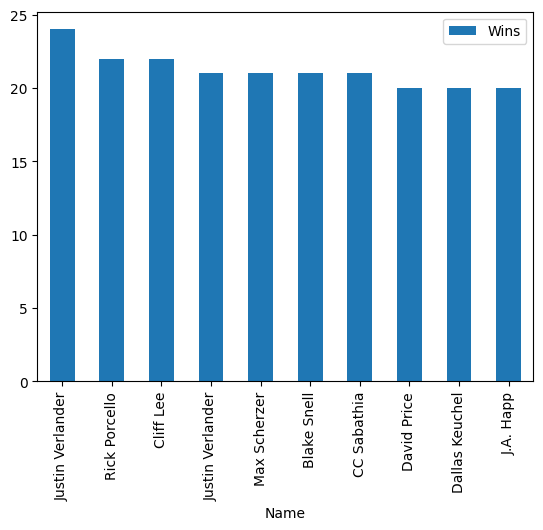

In [63]:
most_wins.plot.bar('Name','Wins')

In [64]:
winsbyyear = stats.groupby('Year').apply(lambda x: x.sort_values('Wins', ascending = False).head(1))

<AxesSubplot: xlabel='Year'>

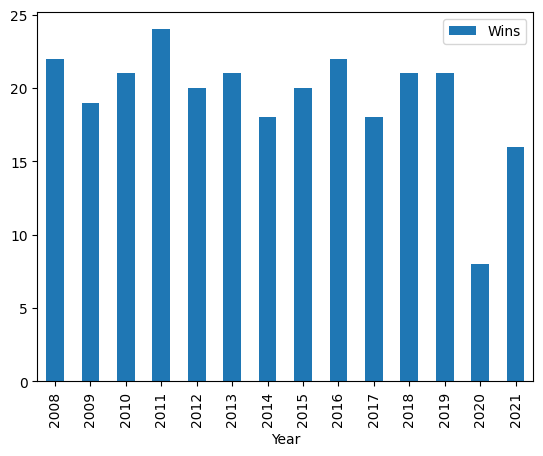

In [65]:
winsbyyear.plot.bar('Year','Wins')

Research the predictors - Wins, complete games and strikeouts are highly correcelated with cy young voting 

In [66]:
stats.corr()['Share']

C:\Users\dherz\AppData\Local\Temp\ipykernel_10888\4153898996.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.corr()['Share']


Age            0.014780
Wins           0.336175
Losses         0.097298
W-L %          0.095550
ERA           -0.050265
G              0.040705
GS             0.235954
GF            -0.034530
CG             0.360092
SHO            0.292808
SV             0.008073
IP             0.268662
H              0.196092
R_x            0.138509
ER             0.134094
HR             0.164073
BB             0.167460
IBB            0.000996
SO             0.351737
HBP            0.122454
BK             0.065237
WP             0.148241
BF             0.247492
ERA+           0.096440
FIP           -0.065658
WHIP          -0.062320
H9            -0.052673
HR9           -0.033896
BB9           -0.048019
SO9            0.076293
SO/W           0.155467
Year          -0.007047
Vote Pts       0.993282
Share          1.000000
Rk            -0.066017
Team Wins      0.043757
Team Losses   -0.045549
Team W-L %     0.067536
GB            -0.044478
Name: Share, dtype: float64

C:\Users\dherz\AppData\Local\Temp\ipykernel_10888\198269374.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.corr()['Share'].plot.bar()


<AxesSubplot: >

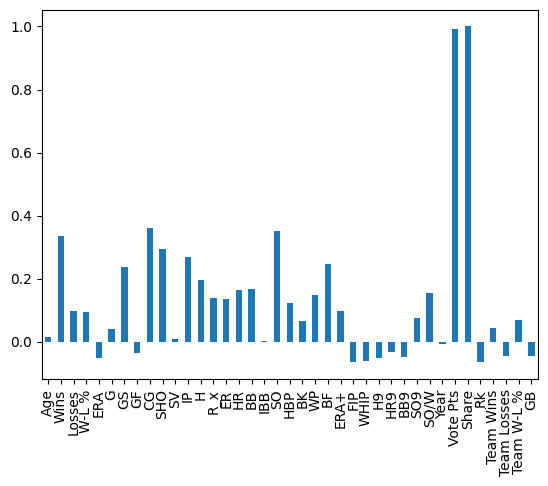

In [67]:
stats.corr()['Share'].plot.bar()

Machine Learning - Linear Regression 

In [68]:
pd.isnull(stats).sum()

Name              0
Age               0
Tm                0
Wins              0
Losses            0
W-L %          1110
ERA               0
G                 0
GS                0
GF                0
CG                0
SHO               0
SV                0
IP                0
H                 0
R_x               0
ER                0
HR                0
BB                0
IBB               0
SO                0
HBP               0
BK                0
WP                0
BF                0
ERA+            216
FIP               3
WHIP              3
H9                3
HR9               3
BB9               3
SO9               3
SO/W            232
Year              0
Vote Pts          0
Share             0
Team              0
Rk                0
Team Wins         0
Team Losses       0
Team W-L %        0
GB                0
dtype: int64

In [69]:
stats.dropna(subset=['Name'], inplace=True)

In [70]:
pd.isnull(stats).sum()

Name              0
Age               0
Tm                0
Wins              0
Losses            0
W-L %          1110
ERA               0
G                 0
GS                0
GF                0
CG                0
SHO               0
SV                0
IP                0
H                 0
R_x               0
ER                0
HR                0
BB                0
IBB               0
SO                0
HBP               0
BK                0
WP                0
BF                0
ERA+            216
FIP               3
WHIP              3
H9                3
HR9               3
BB9               3
SO9               3
SO/W            232
Year              0
Vote Pts          0
Share             0
Team              0
Rk                0
Team Wins         0
Team Losses       0
Team W-L %        0
GB                0
dtype: int64

In [71]:
stats = stats.fillna(0)

In [75]:
stats.replace([np.inf, -np.inf], np.nan, inplace=True)

In [76]:
stats.dropna(inplace=True)

Choosing Predictors for Maching Learning - removing non-numberical fields 

In [77]:
predictors = ['Age','Wins', 'Losses', 'W-L %', 'ERA', 'G', 'GS', 'GF',
       'CG', 'SHO', 'SV', 'IP', 'H', 'R_x', 'ER', 'HR', 'BB', 'IBB', 'SO',
       'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9',
       'SO9', 'SO/W', 'Year','Team Wins',
       'Team Losses', 'Team W-L %', 'GB','Rk']

Creating training data set to test agaisnt the test data set

In [78]:
train = stats[stats['Year'] < 2021]

In [79]:
train[predictors].isnull().any()


Age            False
Wins           False
Losses         False
W-L %          False
ERA            False
G              False
GS             False
GF             False
CG             False
SHO            False
SV             False
IP             False
H              False
R_x            False
ER             False
HR             False
BB             False
IBB            False
SO             False
HBP            False
BK             False
WP             False
BF             False
ERA+           False
FIP            False
WHIP           False
H9             False
HR9            False
BB9            False
SO9            False
SO/W           False
Year           False
Team Wins      False
Team Losses    False
Team W-L %     False
GB             False
Rk             False
dtype: bool

In [80]:
stats['Share'].describe()

count    5207.000000
mean        0.628385
std         6.070022
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: Share, dtype: float64

In [81]:
test = stats[stats['Year'] == 2021]

In [82]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [83]:
reg.fit(train[predictors], train['Share'])

Ridge(alpha=0.1)

In [84]:
predictions = reg.predict(test[predictors])

In [85]:
predictions = pd.DataFrame(predictions, columns=['predictions'], index=test.index)

In [86]:
predictions

,predictions
75,0.290246
76,0.952646
77,-0.828604
78,2.470734
79,2.396984
...,...
3988,-0.371515
3989,2.595288
3990,0.501836
3991,-1.709235


In [87]:
combine = pd.concat([test[['Name','Share']],predictions], axis=1)

In [88]:
combine.sort_values('Share', ascending=False).head(10)

,Name,Share,predictions
300,Robbie Ray,99,14.857136
2569,Gerrit Cole,59,20.029269
780,Lance Lynn,23,11.867713
1832,Nathan Eovaldi,20,6.823102
768,Carlos Rodon,16,13.984876
480,Frankie Montas,10,9.662184
3495,Lance McCullers Jr.,7,7.644775
781,Liam Hendriks,5,5.669959
293,Jose Berrios,4,9.886456
475,Chris Bassitt,1,9.306351


In [89]:
from sklearn.metrics import mean_squared_error

mean_squared_error(combine['Share'],combine['predictions'])

23.70421498908754

In [90]:
combine = combine.sort_values('Share',ascending=False)
combine['Rk'] = list(range(1,combine.shape[0]+1))

In [91]:
combine.head(10)

,Name,Share,predictions,Rk
300,Robbie Ray,99,14.857136,1
2569,Gerrit Cole,59,20.029269,2
780,Lance Lynn,23,11.867713,3
1832,Nathan Eovaldi,20,6.823102,4
768,Carlos Rodon,16,13.984876,5
480,Frankie Montas,10,9.662184,6
3495,Lance McCullers Jr.,7,7.644775,7
781,Liam Hendriks,5,5.669959,8
293,Jose Berrios,4,9.886456,9
475,Chris Bassitt,1,9.306351,10


In [92]:
combine = combine.sort_values('predictions',ascending=False)
combine['Predicted_Rk'] = list(range(1,combine.shape[0]+1))

In [93]:
combine.head(10)

,Name,Share,predictions,Rk,Predicted_Rk
2569,Gerrit Cole,59,20.029269,2,1
300,Robbie Ray,99,14.857136,1,2
768,Carlos Rodon,16,13.984876,5,3
773,Dylan Cease,0,12.022667,423,4
780,Lance Lynn,23,11.867713,3,5
782,Lucas Giolito,0,11.429793,417,6
293,Jose Berrios,4,9.886456,9,7
480,Frankie Montas,10,9.662184,6,8
475,Chris Bassitt,1,9.306351,10,9
494,Sean Manaea,0,9.050098,268,10


In [94]:
combine.sort_values('Share', ascending=False).head(10)

,Name,Share,predictions,Rk,Predicted_Rk
300,Robbie Ray,99,14.857136,1,2
2569,Gerrit Cole,59,20.029269,2,1
780,Lance Lynn,23,11.867713,3,5
1832,Nathan Eovaldi,20,6.823102,4,14
768,Carlos Rodon,16,13.984876,5,3
480,Frankie Montas,10,9.662184,6,8
3495,Lance McCullers Jr.,7,7.644775,7,13
781,Liam Hendriks,5,5.669959,8,20
293,Jose Berrios,4,9.886456,9,7
475,Chris Bassitt,1,9.306351,10,9


In [95]:
actual = combine.sort_values("Share", ascending=False)
predicted = combine.sort_values("predictions", ascending=False)
actual["Rk"] = list(range(1,actual.shape[0]+1))
predicted["Predicted_Rk"] = list(range(1,predicted.shape[0]+1))

In [96]:
def find_ap(combine):
    actual = combine.sort_values('Share',ascending=False).head(5)
    predicted = combine.sort_values('predictions',ascending=False)
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():
        if row['Name'] in actual ['Name'].values:
            found +=1
            ps.append(found/seen)
        seen +=1
    return sum(ps)/len(ps) 
    

In [97]:
find_ap(combine)

0.8314285714285713

Our Model is 83% accurate in predicting the top 5 Cy Young Vote receivers 

In [98]:
years = list(range(2008,2022))

In [99]:
aps = []
all_predictions = []
for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[predictors],train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Name", "Share"]], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [100]:
sum(aps) / len(aps)

0.818072626961516

Model is slighly less accurate when more years were added

In [101]:
def add_ranks(predictions):
    predictions = predictions.sort_values("predictions", ascending=False)
    predictions["Predicted_Rk"] = list(range(1,predictions.shape[0]+1))
    predictions = predictions.sort_values("Share", ascending=False)
    predictions["Rk"] = list(range(1,predictions.shape[0]+1))
    predictions["Diff"] = (predictions["Rk"] - predictions["Predicted_Rk"])
    return predictions

In [102]:
ranking = add_ranks(all_predictions[1])
ranking[ranking['Rk'] <6 ].sort_values('Diff',ascending=False)


,Name,Share,predictions,Predicted_Rk,Rk,Diff
2502,Max Scherzer,15,16.706011,4,5,1
4393,Corey Kluber,80,21.481569,1,1,0
4611,Felix Hernandez,76,18.493968,2,2,0
1597,Chris Sale,37,15.759945,5,3,-2
5203,Jon Lester,22,14.803170,7,4,-3


In [103]:
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Name", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [104]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [105]:
mean_ap

0.818072626961516

Conclusion

The model successfully demonstrated an ability to predict AL Cy Young award winners with a fair degree of accuracy. The backtested results show that the model is 83% accurate in predicting the top 5 Cy Young Vote receivers. This level of performance holds promise for making future predictions, although it's important to acknowledge the model's limitations and potential improvements.

The model performance fluctuated slightly when more years were included in the analysis. This could be due to many factors, including changes in voting trends and player performance patterns. The difference in ranking between actual and predicted shares showed some degree of variation, indicating that while the model was generally good at identifying top performers, it might sometimes misestimate their actual rank.

It's crucial to recognize that in real-world applications, many factors can influence award results, including elements that may not be present in the data set used. Future work could consider adding more features to the model, such as player injuries, mid-season trades, or other non-statistical factors like media perception and narrative.

The model and methods developed here could be applied to other award predictions in baseball or even extended to other sports, showing the versatility and potential of data-driven methods in sports analytics.